# Challenge data
--------------------------------

## Consigne : 

Il y a une liste d’event qui correspondent à l’interaction des utilisateurs avec une application. Pour simplifier, on peut imaginer ça comme un tableau avec 2 colonnes : 1 colonne avec l’id de l’utilisateur et une colonne date+heure de l’event.

L’objectif est d’avoir un graph où sur l’axe x on a week 1, week 2, week 3, etc. et sur l’axe y le pourcentage de personne qui ont été actif sur l’app. La numérotation de la semaine est faite par rapport à l’inscription de l’utilisateur (=premier event capté pour cette utilisateur), donc c’est différent pour chacun.

 $\rightarrow$ exemple pour week 1 y’aura toujours 100%, week 2 certain utilisateurs ne sont plus venu la 2 eme semaine après leur inscription donc imaginons 85%, etc.

Mais il faut faire attention que par exemple un utilisateur qui s’est inscrit il y a 4 semaines et qui est venu les 2 premières semaines est compté comme étant venu pour semaine 1 et 2, est compté comme étant pas venu pour les semaines 3 et 4 et n’est pas pris en compte dans le calcul pour les semaines supérieur à 4.


In [227]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, timezone
import matplotlib.pyplot as plt

In [90]:
def TimeStampToDate(timestamp):
    epoch = datetime(1970, 1, 1, tzinfo=timezone.utc)
    cookie_microseconds_since_epoch = timestamp
    cookie_datetime = epoch + timedelta(microseconds=cookie_microseconds_since_epoch)
    date = str(cookie_datetime)
    return date[:10]

In [2]:
data = pd.read_csv("challenge.csv") 
data2 = data.groupby(['user_pseudo_id'])['event_timestamp'].value_counts().to_frame('count')

In [218]:
list_id = []
timestamp = []
dates = []
for id in data2.index.get_level_values('user_pseudo_id').unique():
    list_id.append(id)
    dates = sorted(list(data2.loc[id].index.values))
    i = 0
    for values in dates:
        if values == int(values):
            a = TimeStampToDate(int(values))
            dates[i] = a
            i = i + 1 
        else:
            i = i + 1 
    timestamp.append(sorted(set(dates)))
data_time_co = pd.DataFrame(timestamp,index=list_id,columns=['connexion'+ str(z) for z in range(43)])

In [225]:
data_time_co

,connexion0,connexion1,connexion2,connexion3,connexion4,connexion5,connexion6,connexion7,connexion8,connexion9,...,connexion33,connexion34,connexion35,connexion36,connexion37,connexion38,connexion39,connexion40,connexion41,connexion42
0021592d3fd4be9974aeef75cb3319ea,2019-07-30,2019-07-31,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
002d561f88ef219559d93cea4d7ea1db,2019-07-08,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
005ea7ba4713bdddaed5da6be19a9279,2019-07-04,2019-07-05,2019-07-06,2019-07-09,2019-07-15,2019-07-22,2019-07-23,2019-07-30,2019-07-31,2019-08-01,...,None,None,None,None,None,None,None,None,None,None
0060f936478d0a58cbb9bbb78625ba51,2019-07-31,2019-08-01,2019-08-03,2019-08-04,2019-08-05,2019-08-07,2019-08-08,2019-08-09,2019-08-10,None,...,None,None,None,None,None,None,None,None,None,None
00927217153d9ca3591e695f9fcb5537,2019-07-08,2019-07-13,2019-07-15,2019-07-16,2019-07-17,2019-07-18,2019-07-19,2019-07-31,2019-08-06,2019-08-07,...,None,None,None,None,None,None,None,None,None,None
00ae2e2b944b09544e480a859b3fcb55,2019-07-16,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
015729f69f9b9ba314ef4a85da2c624a,2019-07-16,2019-08-09,2019-08-12,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
016098a7df541f992704d2635a3cddd9,2019-07-31,2019-08-08,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
01a4fdf7926246acf9d9d9ff2d1dd2b4,2019-08-09,2019-08-12,2019-08-13,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
01b39961addd5832724dbe005a08708f,2019-08-08,2019-08-14,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [244]:
count = []
for e in data_time_co.columns.values:
    count.append(data_time_co[e].count())

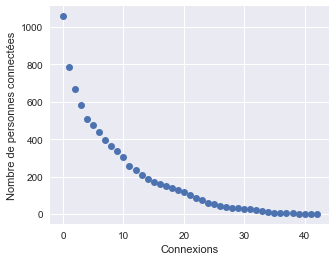

In [281]:
fig = plt.figure(figsize = (5,4))
plt.style.use('seaborn')
plt.plot(count,'o')
plt.ylabel('Nombre de personnes connectées')
plt.xlabel('Connexions')
#plt.xticks(rotation = 45)
plt.show()